# Spain

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [2]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/spain.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(41, 5)

In [4]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-02-15,2,0,0,0
2020-02-16,2,0,0,0
2020-02-17,2,0,0,0
2020-02-18,2,0,0,0
2020-02-19,2,0,0,0
2020-02-20,2,0,0,0
2020-02-21,2,0,0,0
2020-02-22,2,0,0,0
2020-02-23,2,0,0,0


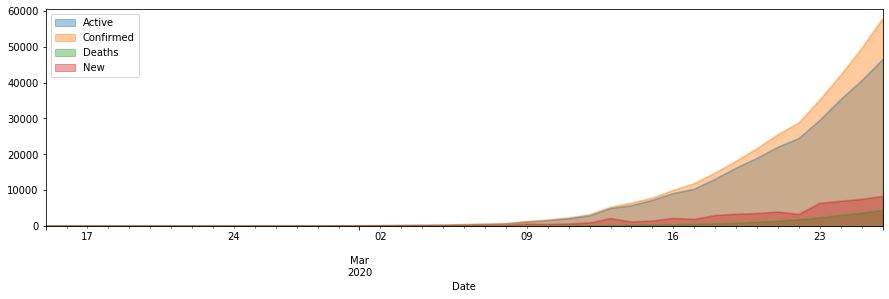

In [87]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.4, subplots=False, stacked=False)

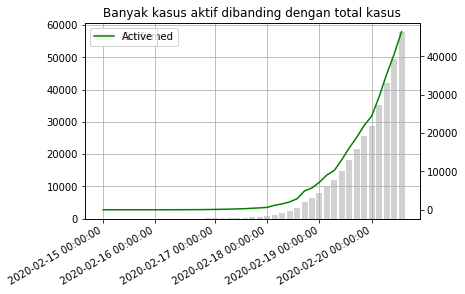

In [7]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

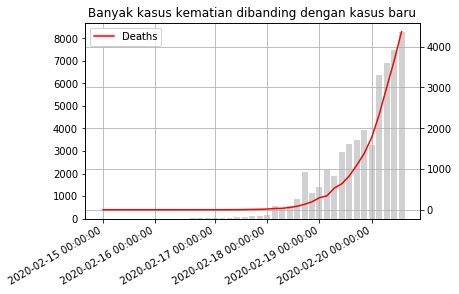

In [8]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active 

- Start: 24-Feb-2020
- End: 26-Mar-2020
- Range: 32 Days

**Data**

In [9]:
y = np.array ((1, 7, 11, 23, 31, 56, 82, 118, 162, 224, 276, 387, 485, 625, 1169, 1524, 2039, 2871, 4906, 5678, 7177, 9070, 10265, 13050, 16139, 18890, 21990, 24421, 29470, 35273, 40501, 46406))
y = y.astype('float64')
y

array([1.0000e+00, 7.0000e+00, 1.1000e+01, 2.3000e+01, 3.1000e+01,
       5.6000e+01, 8.2000e+01, 1.1800e+02, 1.6200e+02, 2.2400e+02,
       2.7600e+02, 3.8700e+02, 4.8500e+02, 6.2500e+02, 1.1690e+03,
       1.5240e+03, 2.0390e+03, 2.8710e+03, 4.9060e+03, 5.6780e+03,
       7.1770e+03, 9.0700e+03, 1.0265e+04, 1.3050e+04, 1.6139e+04,
       1.8890e+04, 2.1990e+04, 2.4421e+04, 2.9470e+04, 3.5273e+04,
       4.0501e+04, 4.6406e+04])

In [10]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

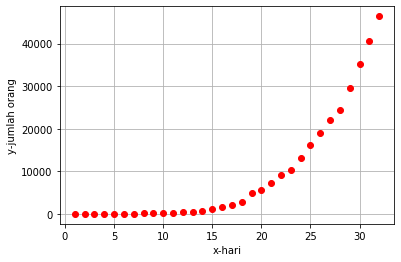

In [11]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [12]:
y = np.array ((1, 7, 11, 23, 31, 56, 82, 118, 162, 224, 276, 387, 485, 625, 1169, 1524, 2039, 2871, 4906, 5678, 7177, 9070, 10265, 13050, 16139, 18890, 21990, 24421, 29470, 35273, 40501, 46406))
y = y.astype('float64')
y

array([1.0000e+00, 7.0000e+00, 1.1000e+01, 2.3000e+01, 3.1000e+01,
       5.6000e+01, 8.2000e+01, 1.1800e+02, 1.6200e+02, 2.2400e+02,
       2.7600e+02, 3.8700e+02, 4.8500e+02, 6.2500e+02, 1.1690e+03,
       1.5240e+03, 2.0390e+03, 2.8710e+03, 4.9060e+03, 5.6780e+03,
       7.1770e+03, 9.0700e+03, 1.0265e+04, 1.3050e+04, 1.6139e+04,
       1.8890e+04, 2.1990e+04, 2.4421e+04, 2.9470e+04, 3.5273e+04,
       4.0501e+04, 4.6406e+04])

In [13]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

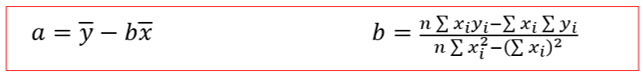

**Membuat xreg untuk plotting selanjutnya**

In [14]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

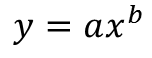

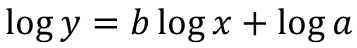

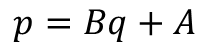

In [15]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [16]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [17]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 3.3254q -0.6354


**Kembalikan ke bentuk pangkat**

In [18]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.2315x^(3.3254)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [19]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9763 dan r^2 = 0.9531


**Plot**

In [20]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([2.31519526e-01, 3.17858466e-01, 4.24516798e-01, 5.53977190e-01,
       7.08790668e-01, 8.91573013e-01, 1.10500159e+00, 1.35181254e+00,
       1.63479827e+00, 1.95680520e+00, 2.32073171e+00, 2.72952628e+00,
       3.18618578e+00, 3.69375389e+00, 4.25531968e+00, 4.87401624e+00,
       5.55301945e+00, 6.29554682e+00, 7.10485638e+00, 7.98424567e+00,
       8.93705080e+00, 9.96664551e+00, 1.10764404e+01, 1.22698819e+01,
       1.35504520e+01, 1.49216668e+01, 1.63870765e+01, 1.79502643e+01,
       1.96148461e+01, 2.13844697e+01, 2.32628140e+01, 2.52535892e+01,
       2.73605355e+01, 2.95874229e+01, 3.19380508e+01, 3.44162475e+01,
       3.70258696e+01, 3.97708019e+01, 4.26549565e+01, 4.56822729e+01,
       4.88567174e+01, 5.21822824e+01, 5.56629869e+01, 5.93028751e+01,
       6.31060170e+01, 6.70765075e+01, 7.12184661e+01, 7.55360369e+01,
       8.00333883e+01, 8.47147122e+01, 8.95842245e+01, 9.46461640e+01,
       9.99047929e+01, 1.05364396e+02, 1.11029281e+02, 1.16903777e+02,
      

Text(0, 0.5, 'y-banyak orang')

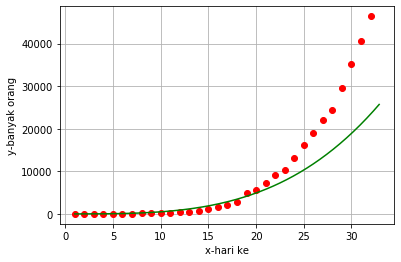

In [21]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

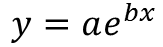

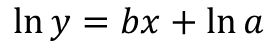

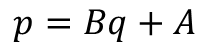

**Linearisasi**

In [22]:
y = np.array ((1, 7, 11, 23, 31, 56, 82, 118, 162, 224, 276, 387, 485, 625, 1169, 1524, 2039, 2871, 4906, 5678, 7177, 9070, 10265, 13050, 16139, 18890, 21990, 24421, 29470, 35273, 40501, 46406))
y = y.astype('float64')
y

array([1.0000e+00, 7.0000e+00, 1.1000e+01, 2.3000e+01, 3.1000e+01,
       5.6000e+01, 8.2000e+01, 1.1800e+02, 1.6200e+02, 2.2400e+02,
       2.7600e+02, 3.8700e+02, 4.8500e+02, 6.2500e+02, 1.1690e+03,
       1.5240e+03, 2.0390e+03, 2.8710e+03, 4.9060e+03, 5.6780e+03,
       7.1770e+03, 9.0700e+03, 1.0265e+04, 1.3050e+04, 1.6139e+04,
       1.8890e+04, 2.1990e+04, 2.4421e+04, 2.9470e+04, 3.5273e+04,
       4.0501e+04, 4.6406e+04])

In [23]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [24]:
p = np.log(y)
q = x

**Hitung regresi linear**

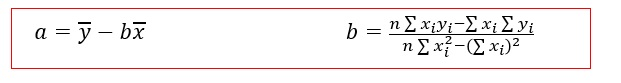

In [25]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [26]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.3038q + 1.9989


**Hitung kembali dalam bentuk bilangan berpangkat**

In [27]:
a = np.e**A
b = B

In [28]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 7.3809x^(0.3038)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [29]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9777 dan r^2 = 0.9560


**Plot data dan regresinya**

In [30]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [31]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([7.38086438e+00, 7.60856597e+00, 7.84329222e+00, 8.08525983e+00,
       8.33469221e+00, 8.59181964e+00, 8.85687952e+00, 9.13011656e+00,
       9.41178304e+00, 9.70213900e+00, 1.00014525e+01, 1.03099999e+01,
       1.06280661e+01, 1.09559447e+01, 1.12939385e+01, 1.16423595e+01,
       1.20015293e+01, 1.23717796e+01, 1.27534522e+01, 1.31468995e+01,
       1.35524848e+01, 1.39705825e+01, 1.44015786e+01, 1.48458711e+01,
       1.53038701e+01, 1.57759985e+01, 1.62626922e+01, 1.67644005e+01,
       1.72815866e+01, 1.78147280e+01, 1.83643171e+01, 1.89308610e+01,
       1.95148830e+01, 2.01169223e+01, 2.07375346e+01, 2.13772929e+01,
       2.20367880e+01, 2.27166286e+01, 2.34174426e+01, 2.41398768e+01,
       2.48845983e+01, 2.56522946e+01, 2.64436746e+01, 2.72594689e+01,
       2.81004306e+01, 2.89673362e+01, 2.98609861e+01, 3.07822053e+01,
       3.17318444e+01, 3.27107801e+01, 3.37199162e+01, 3.47601844e+01,
       3.58325452e+01, 3.69379885e+01, 3.80775351e+01, 3.92522370e+01,
      

Text(0, 0.5, 'y-banyak orang')

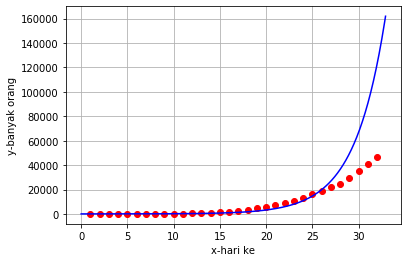

In [32]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [33]:
y = np.array ((1, 7, 11, 23, 31, 56, 82, 118, 162, 224, 276, 387, 485, 625, 1169, 1524, 2039, 2871, 4906, 5678, 7177, 9070, 10265, 13050, 16139, 18890, 21990, 24421, 29470, 35273, 40501, 46406))
y = y.astype('float64')
y

array([1.0000e+00, 7.0000e+00, 1.1000e+01, 2.3000e+01, 3.1000e+01,
       5.6000e+01, 8.2000e+01, 1.1800e+02, 1.6200e+02, 2.2400e+02,
       2.7600e+02, 3.8700e+02, 4.8500e+02, 6.2500e+02, 1.1690e+03,
       1.5240e+03, 2.0390e+03, 2.8710e+03, 4.9060e+03, 5.6780e+03,
       7.1770e+03, 9.0700e+03, 1.0265e+04, 1.3050e+04, 1.6139e+04,
       1.8890e+04, 2.1990e+04, 2.4421e+04, 2.9470e+04, 3.5273e+04,
       4.0501e+04, 4.6406e+04])

In [34]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

**Membentuk regresi polinomial dari matriks**

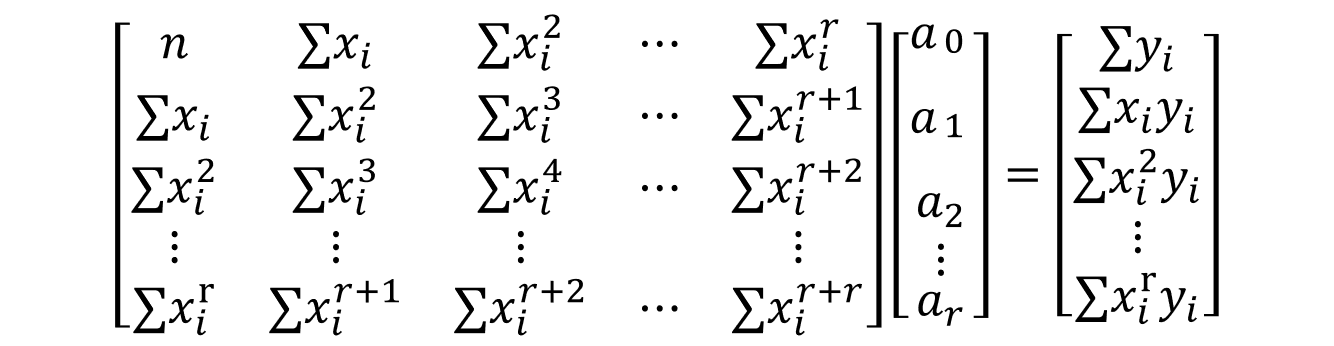

**Mendefinisikan elemen-elemen matriks kiri**

In [35]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[3.20000000e+01, 5.28000000e+02, 1.14400000e+04, 2.78784000e+05],
       [5.28000000e+02, 1.14400000e+04, 2.78784000e+05, 7.24609600e+06],
       [1.14400000e+04, 2.78784000e+05, 7.24609600e+06, 1.96171008e+08],
       [2.78784000e+05, 7.24609600e+06, 1.96171008e+08, 5.46217672e+09]])

**Mendefinisikan elemen-elemen matriks kanan**

In [36]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[2.93327000e+05],
       [8.08864400e+06],
       [2.28065264e+08],
       [6.54004270e+09]])

**Invers matriks sisi kiri**

In [37]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 6.38070078e-01, -1.46945680e-01,  9.03781980e-03,
        -1.62217278e-04],
       [-1.46945680e-01,  4.26074608e-02, -2.89128443e-03,
         5.48159736e-05],
       [ 9.03781980e-03, -2.89128443e-03,  2.07821525e-04,
        -4.08951122e-06],
       [-1.62217278e-04,  5.48159736e-05, -4.08951122e-06,
         8.26163883e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [38]:
Y = Ainv.dot(B)
print(Y)

[[-1123.28406563]
 [  630.70732025]
 [  -84.24102613]
 [    3.44343995]]


In [39]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [40]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 3.4434x^3 + -84.2410X^2 + 630.7073x + -1123.2841


In [41]:
y

array([1.0000e+00, 7.0000e+00, 1.1000e+01, 2.3000e+01, 3.1000e+01,
       5.6000e+01, 8.2000e+01, 1.1800e+02, 1.6200e+02, 2.2400e+02,
       2.7600e+02, 3.8700e+02, 4.8500e+02, 6.2500e+02, 1.1690e+03,
       1.5240e+03, 2.0390e+03, 2.8710e+03, 4.9060e+03, 5.6780e+03,
       7.1770e+03, 9.0700e+03, 1.0265e+04, 1.3050e+04, 1.6139e+04,
       1.8890e+04, 2.1990e+04, 2.4421e+04, 2.9470e+04, 3.5273e+04,
       4.0501e+04, 4.6406e+04])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [42]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9994 dan r^2 = 0.9560


**Plot**

Text(0, 0.5, 'y')

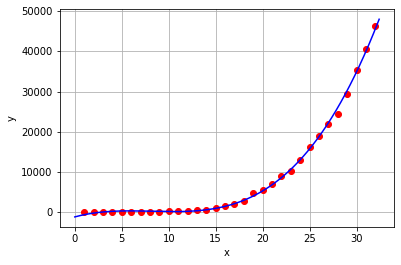

In [43]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

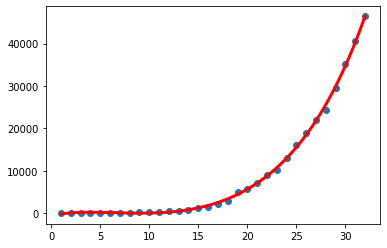

In [44]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [45]:
print (regpoly)

          5         4        3         2
0.002785 x - 0.174 x + 6.56 x - 91.54 x + 463.5 x - 575.8


In [46]:
print(r2_score(y, regpoly(x)))

0.999277180816511


**Selesai**

### Total Death

- Start: 3-Mar-2020
- End: 26-Mar-2020
- Range: 24 Days

**Data**

In [49]:
y = np.array ((1, 2, 3, 8, 10, 17, 30, 36, 55, 86, 133, 196, 294, 342, 533, 638, 831, 1093, 1381, 1772, 2331, 2991, 3647, 4365))
y = y.astype('float64')
y

array([1.000e+00, 2.000e+00, 3.000e+00, 8.000e+00, 1.000e+01, 1.700e+01,
       3.000e+01, 3.600e+01, 5.500e+01, 8.600e+01, 1.330e+02, 1.960e+02,
       2.940e+02, 3.420e+02, 5.330e+02, 6.380e+02, 8.310e+02, 1.093e+03,
       1.381e+03, 1.772e+03, 2.331e+03, 2.991e+03, 3.647e+03, 4.365e+03])

In [50]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

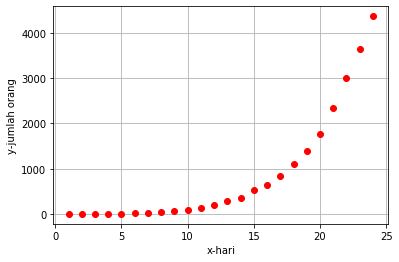

In [51]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [52]:
y = np.array ((1, 2, 3, 8, 10, 17, 30, 36, 55, 86, 133, 196, 294, 342, 533, 638, 831, 1093, 1381, 1772, 2331, 2991, 3647, 4365))
y = y.astype('float64')
y

array([1.000e+00, 2.000e+00, 3.000e+00, 8.000e+00, 1.000e+01, 1.700e+01,
       3.000e+01, 3.600e+01, 5.500e+01, 8.600e+01, 1.330e+02, 1.960e+02,
       2.940e+02, 3.420e+02, 5.330e+02, 6.380e+02, 8.310e+02, 1.093e+03,
       1.381e+03, 1.772e+03, 2.331e+03, 2.991e+03, 3.647e+03, 4.365e+03])

In [53]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

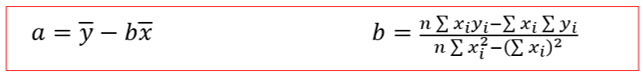

**Membuat xreg untuk plotting selanjutnya**

In [54]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

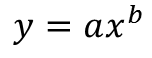

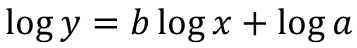

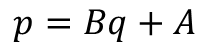

In [55]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [56]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [57]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 2.9477q -0.7572


**Kembalikan ke bentuk pangkat**

In [58]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.1749x^(2.9477)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [59]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9700 dan r^2 = 0.9409


**Plot**

In [60]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([1.74915776e-01, 2.31655748e-01, 2.99387200e-01, 3.79055000e-01,
       4.71599903e-01, 5.77958879e-01, 6.99065398e-01, 8.35849679e-01,
       9.89238903e-01, 1.16015740e+00, 1.34952681e+00, 1.55826626e+00,
       1.78729244e+00, 2.03751979e+00, 2.30986057e+00, 2.60522495e+00,
       2.92452115e+00, 3.26865547e+00, 3.63853238e+00, 4.03505463e+00,
       4.45912326e+00, 4.91163769e+00, 5.39349578e+00, 5.90559388e+00,
       6.44882686e+00, 7.02408820e+00, 7.63226998e+00, 8.27426295e+00,
       8.95095660e+00, 9.66323911e+00, 1.04119975e+01, 1.11981175e+01,
       1.20224839e+01, 1.28859801e+01, 1.37894885e+01, 1.47338904e+01,
       1.57200663e+01, 1.67488953e+01, 1.78212557e+01, 1.89380249e+01,
       2.01000791e+01, 2.13082938e+01, 2.25635435e+01, 2.38667017e+01,
       2.52186412e+01, 2.66202339e+01, 2.80723507e+01, 2.95758619e+01,
       3.11316369e+01, 3.27405441e+01, 3.44034514e+01, 3.61212259e+01,
       3.78947337e+01, 3.97248405e+01, 4.16124111e+01, 4.35583094e+01,
      

Text(0, 0.5, 'y-banyak orang')

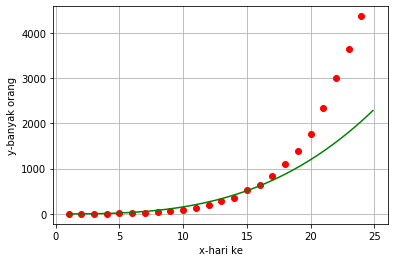

In [61]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

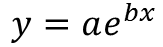

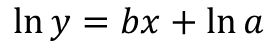

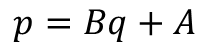

**Linearisasi**

In [62]:
y = np.array ((1, 2, 3, 8, 10, 17, 30, 36, 55, 86, 133, 196, 294, 342, 533, 638, 831, 1093, 1381, 1772, 2331, 2991, 3647, 4365))
y = y.astype('float64')
y

array([1.000e+00, 2.000e+00, 3.000e+00, 8.000e+00, 1.000e+01, 1.700e+01,
       3.000e+01, 3.600e+01, 5.500e+01, 8.600e+01, 1.330e+02, 1.960e+02,
       2.940e+02, 3.420e+02, 5.330e+02, 6.380e+02, 8.310e+02, 1.093e+03,
       1.381e+03, 1.772e+03, 2.331e+03, 2.991e+03, 3.647e+03, 4.365e+03])

In [63]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [64]:
p = np.log(y)
q = x

**Hitung regresi linear**

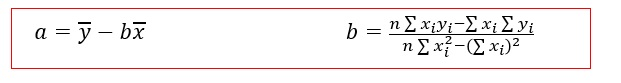

In [65]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [66]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.3523q + 0.5818


**Hitung kembali dalam bentuk bilangan berpangkat**

In [67]:
a = np.e**A
b = B

In [68]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 1.7892x^(0.3523)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [69]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9870 dan r^2 = 0.9742


**Plot data dan regresinya**

In [70]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [71]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([1.78917767e+00, 1.85333088e+00, 1.91978438e+00, 1.98862066e+00,
       2.05992515e+00, 2.13378635e+00, 2.21029593e+00, 2.28954887e+00,
       2.37164351e+00, 2.45668177e+00, 2.54476917e+00, 2.63601507e+00,
       2.73053269e+00, 2.82843937e+00, 2.92985661e+00, 3.03491030e+00,
       3.14373081e+00, 3.25645322e+00, 3.37321744e+00, 3.49416838e+00,
       3.61945617e+00, 3.74923632e+00, 3.88366989e+00, 4.02292375e+00,
       4.16717072e+00, 4.31658986e+00, 4.47136660e+00, 4.63169306e+00,
       4.79776823e+00, 4.96979823e+00, 5.14799658e+00, 5.33258445e+00,
       5.52379096e+00, 5.72185342e+00, 5.92701765e+00, 6.13953830e+00,
       6.35967915e+00, 6.58771343e+00, 6.82392416e+00, 7.06860452e+00,
       7.32205820e+00, 7.58459978e+00, 7.85655513e+00, 8.13826177e+00,
       8.43006935e+00, 8.73234007e+00, 9.04544907e+00, 9.36978500e+00,
       9.70575040e+00, 1.00537623e+01, 1.04142525e+01, 1.07876686e+01,
       1.11744740e+01, 1.15751488e+01, 1.19901903e+01, 1.24201136e+01,
      

Text(0, 0.5, 'y-banyak orang')

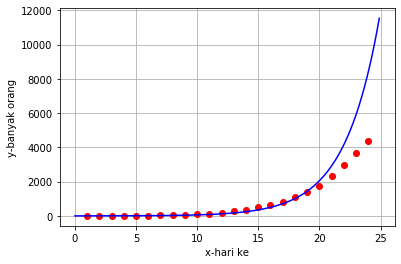

In [72]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [73]:
y = np.array ((1, 2, 3, 8, 10, 17, 30, 36, 55, 86, 133, 196, 294, 342, 533, 638, 831, 1093, 1381, 1772, 2331, 2991, 3647, 4365))
y = y.astype('float64')
y

array([1.000e+00, 2.000e+00, 3.000e+00, 8.000e+00, 1.000e+01, 1.700e+01,
       3.000e+01, 3.600e+01, 5.500e+01, 8.600e+01, 1.330e+02, 1.960e+02,
       2.940e+02, 3.420e+02, 5.330e+02, 6.380e+02, 8.310e+02, 1.093e+03,
       1.381e+03, 1.772e+03, 2.331e+03, 2.991e+03, 3.647e+03, 4.365e+03])

In [74]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

**Membentuk regresi polinomial dari matriks**

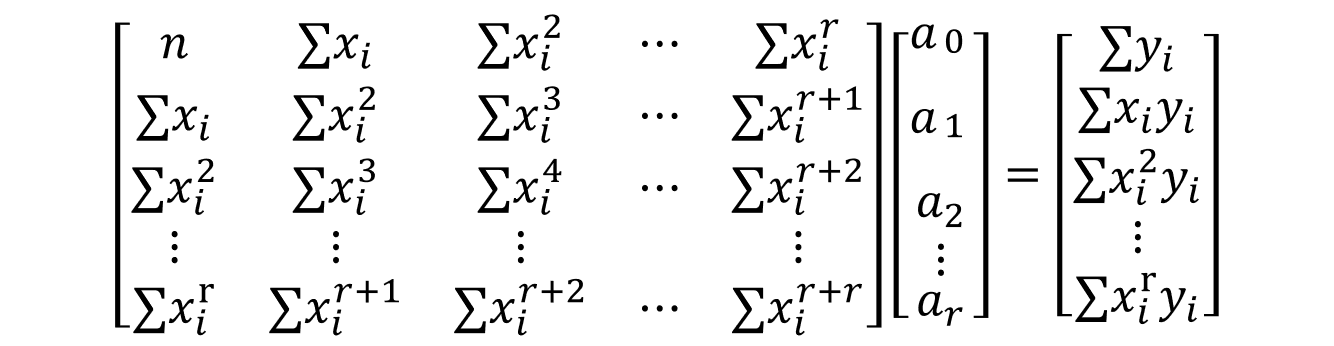

**Mendefinisikan elemen-elemen matriks kiri**

In [75]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[2.400000e+01, 3.000000e+02, 4.900000e+03, 9.000000e+04],
       [3.000000e+02, 4.900000e+03, 9.000000e+04, 1.763020e+06],
       [4.900000e+03, 9.000000e+04, 1.763020e+06, 3.597000e+07],
       [9.000000e+04, 1.763020e+06, 3.597000e+07, 7.547407e+08]])

**Mendefinisikan elemen-elemen matriks kanan**

In [76]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[2.07950000e+04],
       [4.31553000e+05],
       [9.18289300e+06],
       [1.98928275e+08]])

**Invers matriks sisi kiri**

In [77]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 9.26877470e-01, -2.82718489e-01,  2.30566535e-02,
        -5.48967940e-04],
       [-2.82718489e-01,  1.06747207e-01, -9.54828853e-03,
         2.39418838e-04],
       [ 2.30566535e-02, -9.54828853e-03,  9.02559598e-04,
        -2.34601684e-05],
       [-5.48967940e-04,  2.39418838e-04, -2.34601684e-05,
         6.25604490e-07]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [78]:
Y = Ainv.dot(B)
print(Y)

[[-212.05862978]
 [ 134.21103078]
 [ -19.91206434]
 [   0.9243357 ]]


In [79]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [80]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.9243x^3 + -19.9121X^2 + 134.2110x + -212.0586


In [81]:
y

array([1.000e+00, 2.000e+00, 3.000e+00, 8.000e+00, 1.000e+01, 1.700e+01,
       3.000e+01, 3.600e+01, 5.500e+01, 8.600e+01, 1.330e+02, 1.960e+02,
       2.940e+02, 3.420e+02, 5.330e+02, 6.380e+02, 8.310e+02, 1.093e+03,
       1.381e+03, 1.772e+03, 2.331e+03, 2.991e+03, 3.647e+03, 4.365e+03])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [82]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9987 dan r^2 = 0.9742


**Plot**

Text(0, 0.5, 'y')

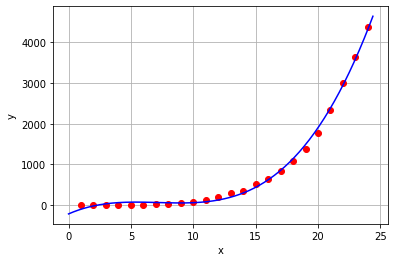

In [83]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

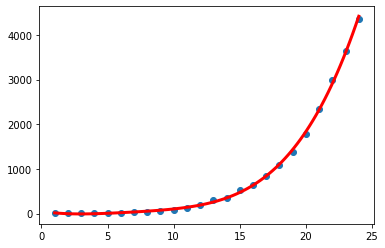

In [84]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [85]:
print (regpoly)

            5           4         3         2
-0.0003867 x + 0.05894 x - 1.357 x + 13.69 x - 51.37 x + 53.91


In [86]:
print(r2_score(y, regpoly(x)))

0.9993178437803848


**Selesai**